In [1]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

com_class = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
rec_class = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
all_class = com_class + rec_class

In [2]:
exclude_sign = "~#$%^&*()[]{}<>|+=1234567890"
replace_sign = "@,.?!-;"

In [3]:
def preprocessing(data):
    ans = []
    for i in range(len(data)):
        sentence = data[i]
        for c in exclude_sign:
            sentence = sentence.replace(c, "")
        for c in replace_sign:
            sentence = sentence.replace(c, " ")
        ans.append(sentence)
    return ans

In [4]:
def plot_contingency_matrix(cm, x_labels, y_labels, title, cmap = plt.cm.BuPu):
    plt.figure(figsize=(12,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title, fontsize = 22)
    plt.colorbar()
    xlocations = np.array(range(len(x_labels)))
    plt.xticks(xlocations, x_labels, fontsize = 14)
    plt.yticks(xlocations, y_labels, fontsize = 14)
    tick_array = np.arange(len(x_labels))
    x, y = np.meshgrid(tick_array, tick_array)
    for i, j in zip(x.flatten(), y.flatten()):
        plt.text(j, i, cm[i][j], ha = "center", va = "center", color = "black", fontsize = 24)
    plt.ylabel('Classes', fontsize = 18)
    plt.xlabel('Clusters', fontsize = 18)
    fig = plt.gcf()
    plt.show()
    fig.savefig(str(cm[0][0]) + '.png', dpi=300, bbox_inches = 'tight')

In [5]:
all_data = fetch_20newsgroups(subset='all', categories=all_class, shuffle=True, random_state=42)
# 1 represent "recreational activity", 0 represent "computer classes"
Y = [0] * len(all_data.target)
for i in range(len(Y)):
    if all_data.target[i] >= 4:
        Y[i] = 1


In [6]:
trim_all_data = preprocessing(all_data.data)
count_vectorizer = CountVectorizer(min_df=3, stop_words='english')
tfidf_transformer = TfidfTransformer()

X_count = count_vectorizer.fit_transform(trim_all_data)
X_tfidf = tfidf_transformer.fit_transform(X_count)
print (X_tfidf.shape)

(7882, 23825)


In [7]:
kmeans = KMeans(n_clusters=2, max_iter = 1000, n_init = 30, random_state=0)
kmeans.fit(X_tfidf)


KeyboardInterrupt: 

In [ ]:
contingency = contingency_matrix(Y, kmeans.labels_)

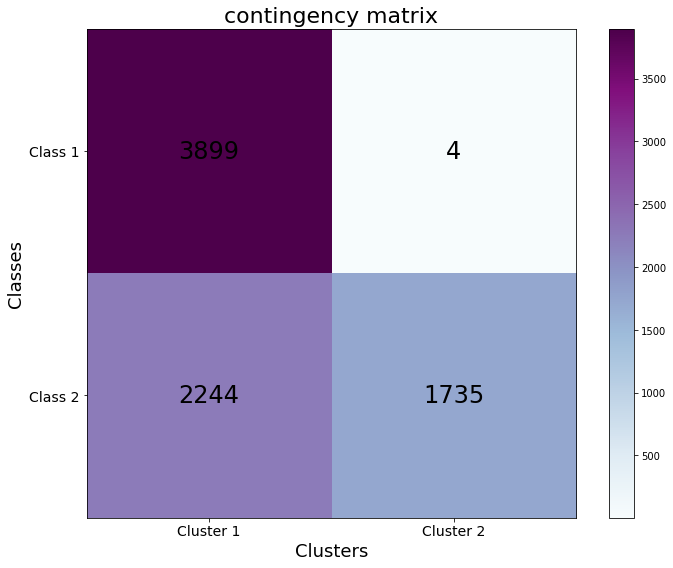

In [9]:
classes = ["Class 1", "Class 2"]
clusters = ["Cluster 1", "Cluster 2"]
plot_contingency_matrix(contingency, clusters, classes, "contingency matrix")

In [10]:
print("Five metrics about the K-means cluster: ")
print('Homogeneity:', metrics.homogeneity_score(Y, kmeans.labels_))
print('Completeness:', metrics.completeness_score(Y, kmeans.labels_))
print('V-measure:', metrics.v_measure_score(Y, kmeans.labels_))
print('Adjusted Rand Score:', metrics.adjusted_rand_score(Y, kmeans.labels_))
print('Adjusted Mutual Info Score:', metrics.adjusted_mutual_info_score(Y, kmeans.labels_))

Homogeneity: 0.2567150164397567
Completeness: 0.3371769065937147
V-measure: 0.29149537739860254
Adjusted Rand Score: 0.1844496330900049
Adjusted Mutual Info Score: 0.291421716295594


In [8]:
n = 1000

In [9]:
svd = TruncatedSVD(n_components=n, n_iter=10, random_state=42)

In [10]:
svd.fit(X_tfidf)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=10,
             random_state=42, tol=0.0)

In [14]:
r = [i for i in range(n)]
ratio = svd.explained_variance_ratio_
percentage = [0] * 1000
percentage[0] = ratio[0]
for i in range(1, n):
    percentage[i] = percentage[i - 1] + ratio[i]

[0.00130696 0.00548051 0.0038301  0.00376488 0.00336715 0.00271022
 0.0025956  0.00250716 0.00242575 0.00230138 0.00224299 0.00218105
 0.00213836 0.00204596 0.00204346 0.0019881  0.00198234 0.00192682
 0.00190034 0.00185085 0.00181039 0.00177674 0.00176438 0.00174005
 0.00171552 0.0016944  0.00166972 0.00163276 0.00161862 0.00160689
 0.00158855 0.00157443 0.0015612  0.00154667 0.001528   0.00150852
 0.00150177 0.0014947  0.00148358 0.00145234 0.00143866 0.00143375
 0.00142259 0.00140863 0.00139207 0.00138566 0.00137816 0.00137567
 0.00135894 0.00134298 0.00134012 0.00132024 0.00130254 0.00129887
 0.00129557 0.00128724 0.0012786  0.0012766  0.00127078 0.00125671
 0.00124837 0.00123808 0.00123474 0.00123033 0.00121966 0.00121737
 0.00119553 0.00118935 0.0011873  0.00118152 0.00116989 0.00116644
 0.00116032 0.00115647 0.00114981 0.00114564 0.00113785 0.00113076
 0.00112635 0.00111456 0.00111268 0.00110921 0.00110353 0.0011005
 0.00109389 0.00109092 0.00107897 0.00107843 0.00107388 0.00106

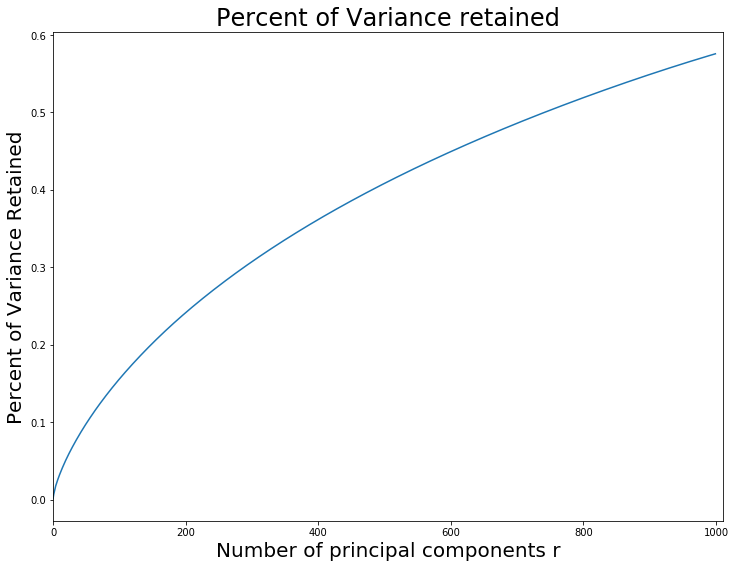

In [15]:
plt.figure(figsize = (12, 9))
plt.xlabel('Number of principal components r', fontsize = 20)
plt.ylabel('Percent of Variance Retained', fontsize = 20)
plt.title('Percent of Variance retained', fontsize = 24)
plt.xlim([0.0, 1010])
plt.plot(r, percentage)
fig = plt.gcf()
plt.show
fig.savefig('percent.png', dpi=300, bbox_inches = 'tight')